In [43]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alokd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alokd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alokd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\alokd\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
Air_rate =pd.read_csv('BA_AirlineReviews.csv')
Air_rate.head(5)

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [8]:
Air_rate.shape

(3701, 20)

In [9]:
Air_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3701 non-null   int64  
 1   OverallRating          3696 non-null   float64
 2   ReviewHeader           3701 non-null   object 
 3   Name                   3701 non-null   object 
 4   Datetime               3701 non-null   object 
 5   VerifiedReview         3701 non-null   bool   
 6   ReviewBody             3701 non-null   object 
 7   TypeOfTraveller        2930 non-null   object 
 8   SeatType               3699 non-null   object 
 9   Route                  2926 non-null   object 
 10  DateFlown              2923 non-null   object 
 11  SeatComfort            3585 non-null   float64
 12  CabinStaffService      3574 non-null   float64
 13  GroundService          2855 non-null   float64
 14  ValueForMoney          3700 non-null   float64
 15  Reco

In [14]:
Air_rate.drop('Name', axis =1, inplace =True)

In [12]:
Air_rate.isna().sum()

OverallRating               5
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort               116
CabinStaffService         127
GroundService             846
ValueForMoney               1
Recommended                 0
Aircraft                 1779
Food&Beverages            386
InflightEntertainment    1150
Wifi&Connectivity        3092
dtype: int64

In [15]:
Air_rate.describe()

,OverallRating,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Food&Beverages,InflightEntertainment,Wifi&Connectivity
count,3696.000000,3585.000000,3574.000000,2855.000000,3700.000000,3315.000000,2551.000000,609.000000
mean,4.734307,2.875314,3.254057,2.784238,2.688378,2.713122,2.646021,1.924466
std,3.175306,1.362081,1.489709,1.457058,1.471887,1.437092,1.398509,1.352705
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
75%,8.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [17]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_col_Air_rate = Air_rate.select_dtypes(include=numerics)
numeric_col_Air_rate

,OverallRating,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
1,3.0,2.0,3.0,1.0,2.0,1.0,2.0,2.0
2,8.0,3.0,3.0,4.0,3.0,4.0,NaN,NaN
3,1.0,3.0,3.0,1.0,1.0,NaN,NaN,NaN
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
3696,1.0,3.0,1.0,NaN,3.0,2.0,NaN,NaN
3697,9.0,4.0,5.0,NaN,3.0,4.0,NaN,NaN
3698,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
3699,4.0,1.0,3.0,NaN,1.0,5.0,NaN,NaN


In [21]:
missing_values =numeric_col_Air_rate.isnull().sum()
print("\nMissing Values in Numeric Columns:")
print(missing_values[missing_values > 0])


Missing Values in Numeric Columns:
OverallRating               5
SeatComfort               116
CabinStaffService         127
GroundService             846
ValueForMoney               1
Food&Beverages            386
InflightEntertainment    1150
Wifi&Connectivity        3092
dtype: int64


In [20]:
Air_rate['Datetime']=pd.to_datetime(Air_rate['Datetime'])
Air_rate['Years']=Air_rate['Datetime'].dt.year
Air_rate['Month']=Air_rate['Datetime'].dt.month
Air_rate['Day']=Air_rate['Datetime'].dt.day
Air_rate['Day_name']=Air_rate['Datetime'].dt.day_name()

In [23]:
#Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma.
stemmer = WordNetLemmatizer()

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

Air_rate['Recommended']= label_encoder.fit_transform(Air_rate['Recommended'])
Air_rate.head(5)

,OverallRating,ReviewHeader,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,...,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity,Years,Month,Day,Day_name
0,1.0,"""Service level far worse then Ryanair""",2023-11-19,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,...,1.0,0,NaN,NaN,NaN,NaN,2023,11,19,Sunday
1,3.0,"""do not upgrade members based on status""",2023-11-19,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,...,2.0,0,A320,1.0,2.0,2.0,2023,11,19,Sunday
2,8.0,"""Flight was smooth and quick""",2023-11-16,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,...,3.0,1,A320,4.0,NaN,NaN,2023,11,16,Thursday
3,1.0,"""Absolutely hopeless airline""",2023-11-16,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,...,1.0,0,NaN,NaN,NaN,NaN,2023,11,16,Thursday
4,1.0,"""Customer Service is non existent""",2023-11-14,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,...,1.0,0,NaN,1.0,1.0,1.0,2023,11,14,Tuesday


# Exploratory Data Analysis (EDA)

([<matplotlib.patches.Wedge at 0x167874497f0>,
 [Text(-0.32425193044297196, 1.0511235348920727, '0'),
  Text(0.32425193044297185, -1.0511235348920727, '1')],
 [Text(-0.17686468933253016, 0.5733401099411305, '59.5%'),
  Text(0.17686468933253008, -0.5733401099411305, '40.5%')])

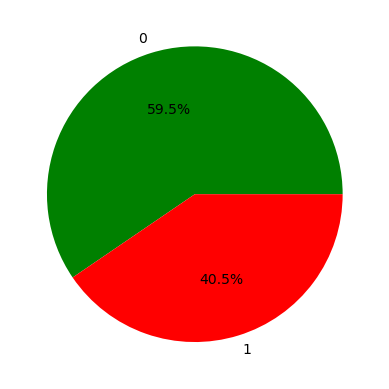

In [32]:
##What % of users are talking negatively about the product/services?

sentiment_count = Air_rate.Recommended.value_counts()
sentiment_type =  Air_rate.Recommended.value_counts().index                # 1- Yes    0- No
plt.pie(sentiment_count,labels=sentiment_type, autopct="%1.1f%%",colors=['green', 'red'])

In [34]:
Air_rate['VerifiedReview_enc']=Air_rate['VerifiedReview'].astype('category').cat.codes

In [35]:
Air_rate.head(5)

,OverallRating,ReviewHeader,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,...,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity,Years,Month,Day,Day_name,VerifiedReview_enc
0,1.0,"""Service level far worse then Ryanair""",2023-11-19,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,...,0,NaN,NaN,NaN,NaN,2023,11,19,Sunday,1
1,3.0,"""do not upgrade members based on status""",2023-11-19,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,...,0,A320,1.0,2.0,2.0,2023,11,19,Sunday,1
2,8.0,"""Flight was smooth and quick""",2023-11-16,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,...,1,A320,4.0,NaN,NaN,2023,11,16,Thursday,0
3,1.0,"""Absolutely hopeless airline""",2023-11-16,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,...,0,NaN,NaN,NaN,NaN,2023,11,16,Thursday,1
4,1.0,"""Customer Service is non existent""",2023-11-14,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,...,0,NaN,1.0,1.0,1.0,2023,11,14,Tuesday,0


([<matplotlib.patches.Wedge at 0x167874a7460>,
 [Text(-0.32425193044297196, 1.0511235348920727, '0'),
  Text(0.32425193044297185, -1.0511235348920727, '1')],
 [Text(-0.17686468933253016, 0.5733401099411305, '59.5%'),
  Text(0.17686468933253008, -0.5733401099411305, '40.5%')])

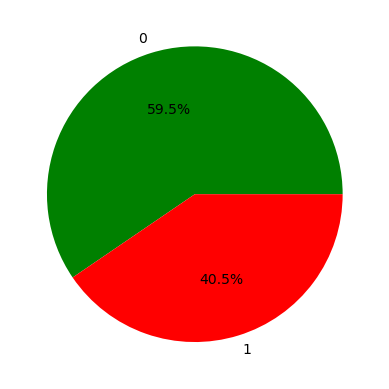

In [36]:
sentiment_count1 = Air_rate.VerifiedReview_enc.value_counts()
sentiment_type1 =  Air_rate.VerifiedReview_enc.value_counts().index                # 1- True     0- False
plt.pie(sentiment_count,labels=sentiment_type1, autopct="%1.1f%%",colors=['green', 'red'])

# Out of total Reviews in different categories, What % of reviews are negative in different categories?

In [38]:
Air_rate.columns

Index(['OverallRating', 'ReviewHeader', 'Datetime', 'VerifiedReview',
       'ReviewBody', 'TypeOfTraveller', 'SeatType', 'Route', 'DateFlown',
       'SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney',
       'Recommended', 'Aircraft', 'Food&Beverages', 'InflightEntertainment',
       'Wifi&Connectivity', 'Years', 'Month', 'Day', 'Day_name',
       'VerifiedReview_enc'],
      dtype='object')

Text(0.5, 0, 'Categories')

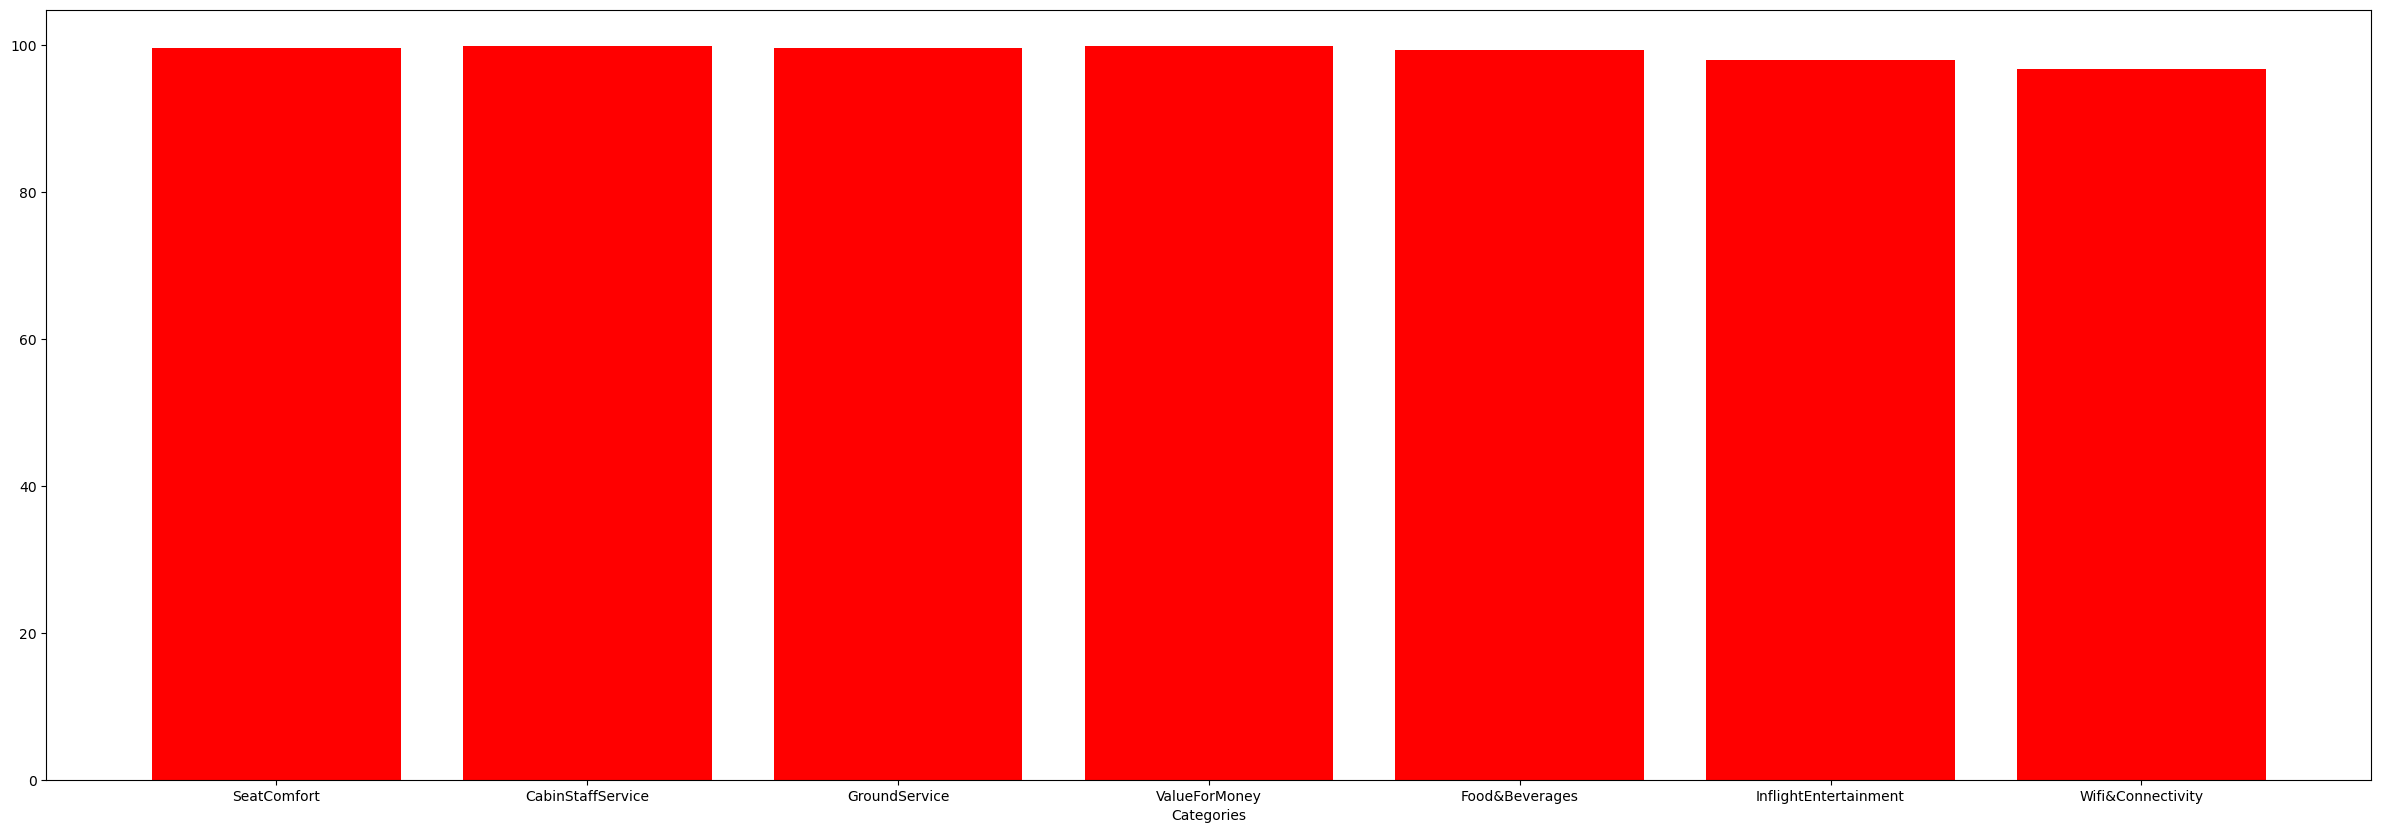

In [41]:
col = ['SeatComfort', 'CabinStaffService',
       'GroundService', 'ValueForMoney', 'Food&Beverages', 'InflightEntertainment',
       'Wifi&Connectivity']
negative_category=[]
for i in col:
    k = ((Air_rate[i].sum()-Air_rate[Air_rate[i]==1]['Recommended'].sum())/Air_rate[i].sum())*100
    negative_category.append(k)
fig = plt.figure(figsize = (30, 10))
plt.bar(col,negative_category,color ='red')
plt.xlabel("Categories")

In [66]:
#to preprocess the text from the dataset
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"'s", " ", text)
    text = re.sub(r"'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"'re", " are ", text)
    text = re.sub(r"'d", " would ", text)
    text = re.sub(r"'ll", " will ", text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ',text)
    text = re.sub(r'\^[a-zA-Z]\s+', ' ',text)
    text = re.sub(r'\s+', ' ',text)
    text = text.strip(' ')
    text =text.split()
    text = [stemmer.lemmatize(word) for word in text]
    text = ' '.join(text)

    return text
Air_rate['ReviewBody'] = Air_rate['ReviewBody'].map(lambda com : clean_text(com))
Air_rate['ReviewBody'][0]

'4 hour takeoff received mail stating cryptic message disruption expected limit many plane leave time. capacity heathrow airport really hit british airway surprise, 4h departure? anyhow - took one hour delay - forced check hand luggage. travel hand luggage avoid waiting ultra slow processing checked luggage. overall 2h later home planed, really reason, due incompetent people. service level far worse ryanair triple price. really never again. thanks nothing.'

In [68]:
#Stop Words Removal

In [67]:
Air_rate['ReviewBody'] = Air_rate['ReviewBody'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
Air_rate['ReviewBody'][0]

'4 hour takeoff received mail stating cryptic message disruption expected limit many plane leave time. capacity heathrow airport really hit british airway surprise, 4h departure? anyhow - took one hour delay - forced check hand luggage. travel hand luggage avoid waiting ultra slow processing checked luggage. overall 2h later home planed, really reason, due incompetent people. service level far worse ryanair triple price. really never again. thanks nothing.'

In [90]:
Air_rate['CombinedReview'] = Air_rate[['SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney', 'Food&Beverages', 'InflightEntertainment', 'Wifi&Connectivity']].astype(str).agg(' '.join, axis=1)
X = Air_rate['ReviewBody']
y=Air_rate['CombinedReview']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

In [87]:
X.shape

(3701,)

# Feature Matrix through TF-IDF

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features = 1500, min_df= 5, max_df = 0.7, stop_words= stopwords.words('english'))

count_train1 = tfidf_vectorizer.fit_transform(X_train)
count_test1 = tfidf_vectorizer.transform(X_test)

In [92]:
pd.DataFrame(count_train1.toarray(), columns = tfidf_vectorizer.get_feature_names_out())

,00,000,10,100,11,12,13,14,15,16,...,wt,yang,year,years,yes,yet,york,young,zero,zurich
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.084508,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.079667,0.0,0.0,0.0,0.119835,0.0,0.365040,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.203642,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2956,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2957,0.0,0.209195,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2958,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
count_train1.shape

(2960, 1500)

In [93]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
nbclassifier = MultinomialNB()

In [94]:
nbclassifier.fit(count_train1, y_train)

MultinomialNB()

In [95]:
#to predict the labels on the test sets
pred = nbclassifier.predict(count_test1)

In [96]:
#to find the accuracy of the model
score =metrics.accuracy_score(y_test, pred)
score

0.03643724696356275

In [97]:
nbclassifier.fit(count_train1, y_train)
pred1 = nbclassifier.predict(count_test1)
score =metrics.accuracy_score(y_test, pred1)
score

0.03643724696356275

In [99]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

results = confusion_matrix(pred, y_test)
results

array([[11,  5,  1, ...,  1,  1,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 2,  0,  0, ...,  0, 10,  1],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

# Deep Learning in Picture


In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.initializers import RandomNormal

In [122]:
def get_model(n_inputs, n_outputs):
  batch_size = 256  
  hidden_units = 64
  dropout = 0.2

  def get_model(n_inputs, n_outputs):
    hidden_units = 64  # You can adjust the number of hidden units as needed

    model = Sequential()
    model.add(Dense(hidden_units, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))  # You can adjust the dropout rate as needed
    model.add(Dense(n_outputs, activation='sigmoid'))  # Assuming binary classification, adjust for multiclass

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


In [123]:
import tensorflow as tf
from sklearn.model_selection import RepeatedKFold

In [126]:
def evaluate_model(X,y):
  results_test = []
  results_train =[]
  callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5,min_delta = 0.05)
  n_inputs = X.to_numpy().reshape(-1, 1)  # Number of input features
  n_outputs = 1          # Number of output classes
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  for train_ix,test_ix in cv.split(X):
    X_train, X_test = X[train_ix], X[test_ix]
    y_train,y_test = y[train_ix],y[test_ix]
    model = get_model(n_inputs, n_outputs)
    model.compile(X_train,y_train,verbose = 0,epochs = 50,callbacks = callback)
    yhat_train = model.predict(X_train)
    yhat_test = model.predict(X_test)
    train_log_loss = log_loss(y_train, yhat_train)
    test_log_loss = log_loss(y_test,yhat_test)
    results_train.append(train_log_loss)
    results_test.append(test_log_loss)
  return results_train,results_test,model

In [127]:
results_train,results_test,model = evaluate_model(X, y)
print(results_train)
print(results_test)

AttributeError: 'NoneType' object has no attribute 'compile'

In [111]:
X

0    4 hour takeoff received mail stating cryptic m...
1    recently delay british airway bru lhr due staf...
2    boarded time, took age get runway due congesti...
3    5 day flight, advised ba cancelled asked u reb...
4    traveled lisbon dream vacation, cruise portuga...
Name: ReviewBody, dtype: object